In [61]:
import pandas as pd
from tqdm import tqdm

hypothesis_file = 'data/fever/train50-truncated.hypothesis'
premise_file = 'data/fever/train50-truncated.premise'
label_file = 'data/fever/train50-truncated.label'
index_file = 'data/fever/train50-truncated.index'
logprobs_file = 'finetuning-roberta/outputs_parameter_tuning/params1/train50-truncated-finetuned-roberta-params1-logprobs'
decision_file = 'finetuning-roberta/outputs_parameter_tuning/params1/train50-truncated-finetuned-roberta-params1-results'

hypothesis_fp = open(hypothesis_file, "r")
premise_fp = open(premise_file, "r")
label_fp = open(label_file, "r")
index_fp = open(index_file, "r")
logprobs_fp = open(logprobs_file, "r")
decision_fp = open(decision_file, "r")

In [62]:
logprobs_hdr = logprobs_fp.readline()
logprobs = []
for output in tqdm(logprobs_fp.readlines()):
    output = output.rstrip().split()
    if len(output)==4:
        probs = [float(output[1][1:]), float(output[2]), float(output[3][:-1])]
    elif len(output)==5 and output[1]=='[':
        probs = [float(output[2]), float(output[3]), float(output[4][:-1])]
    elif len(output)==5 and output[4]==']':
        probs = [float(output[1][1:]), float(output[2]), float(output[3])]
    elif len(output)==6:
        probs = [float(output[2]), float(output[3]), float(output[4])]
    logprobs.append(probs)

100%|██████████| 3000039/3000039 [00:09<00:00, 311582.80it/s]


In [63]:
logprobs = pd.DataFrame(logprobs)

In [64]:
index = []
for output in tqdm(index_fp.readlines()):
    output = output.rstrip().split()
    index.append(output)

100%|██████████| 9797581/9797581 [00:18<00:00, 528499.64it/s] 


In [65]:
index = pd.DataFrame(index)

In [66]:
data = pd.concat([index, logprobs], axis=1, ignore_index=True)

In [67]:
data = data.drop(1, 1)
data = data.drop(2, 1)
data = data.drop(3, 1)

In [68]:
data.columns = ['ids', 'supports', 'neutral', 'refutes']

In [69]:
data['claim_ids'] = data.groupby('ids').cumcount()
result = data.pivot(index='ids', columns='claim_ids')

In [70]:
result.head(10)

supports                                                    \
claim_ids       0         1         2         3         4         5     
ids                                                                     
10              NaN       NaN       NaN       NaN       NaN       NaN   
100002          NaN       NaN       NaN       NaN       NaN       NaN   
100004    -2.249075 -2.928968 -2.511117 -3.189722 -3.207441 -3.200376   
100005          NaN       NaN       NaN       NaN       NaN       NaN   
100006          NaN       NaN       NaN       NaN       NaN       NaN   
100008    -3.249417 -3.236319 -3.258230 -3.270654 -3.232797 -3.257920   
100009          NaN       NaN       NaN       NaN       NaN       NaN   
10001           NaN       NaN       NaN       NaN       NaN       NaN   
100014          NaN       NaN       NaN       NaN       NaN       NaN   
100015    -3.206785 -3.215637 -3.228110 -3.224283 -3.215745 -3.231602   

                                                   ... refutes              \
claim_ids       6         7         8         9    ...     353 354 355 356   
ids                                                ...                       
10              NaN       NaN       NaN       NaN  ...     NaN NaN NaN NaN   
100002          NaN       NaN       NaN       NaN  ...     NaN NaN NaN NaN   
100004    -3.142753 -3.202490 -3.227860 -3.197501  ...     NaN NaN NaN NaN   
100005          NaN       NaN       NaN       NaN  ...     NaN NaN NaN NaN   
100006          NaN       NaN       NaN       NaN  ...     NaN NaN NaN NaN   
100008    -3.253166 -3.256280 -3.252097 -3.267854  ...     NaN NaN NaN NaN   
100009          NaN       NaN       NaN       NaN  ...     NaN NaN NaN NaN   
10001           NaN       NaN       NaN       NaN  ...     NaN NaN NaN NaN   
100014          NaN       NaN       NaN       NaN  ...     NaN NaN NaN NaN   
100015    -3.209411 -3.236177 -3.235633 -3.231221  ...     NaN NaN NaN NaN   

                                   
claim_ids 357 358 359 360 361 362  
ids                                
10        NaN NaN NaN NaN NaN NaN  
100002    NaN NaN NaN NaN NaN NaN  
100004    NaN NaN NaN NaN NaN NaN  
100005    NaN NaN NaN NaN NaN NaN  
100006    NaN NaN NaN NaN NaN NaN  
100008    NaN NaN NaN NaN NaN NaN  
100009    NaN NaN NaN NaN NaN NaN  
10001     NaN NaN NaN NaN NaN NaN  
100014    NaN NaN NaN NaN NaN NaN  
100015    NaN NaN NaN NaN NaN NaN  

[10 rows x 1089 columns]

In [71]:
import pandas as pd
from tqdm import tqdm

hypothesis_file = 'data/fever/train50-truncated.hypothesis'
premise_file = 'data/fever/train50-truncated.premise'
label_file = 'data/fever/train50-truncated.label'
index_file = 'data/fever/train50-truncated.index'
logprobs_file = 'finetuning-roberta/outputs_parameter_tuning/params1/train50-truncated-finetuned-roberta-params1-logprobs'
decision_file = 'finetuning-roberta/outputs_parameter_tuning/params1/train50-truncated-finetuned-roberta-params1-results'

hypothesis_fp = open(hypothesis_file, "r")
premise_fp = open(premise_file, "r")
label_fp = open(label_file, "r")
index_fp = open(index_file, "r")
logprobs_fp = open(logprobs_file, "r")
decision_fp = open(decision_file, "r")

In [72]:
logprobs_hdr = logprobs_fp.readline()
logprobs = []
for output in tqdm(logprobs_fp.readlines()):
    output = output.rstrip().split()
    if len(output)==4:
        probs = [float(output[1][1:]), float(output[2]), float(output[3][:-1])]
    elif len(output)==5 and output[1]=='[':
        probs = [float(output[2]), float(output[3]), float(output[4][:-1])]
    elif len(output)==5 and output[4]==']':
        probs = [float(output[1][1:]), float(output[2]), float(output[3])]
    elif len(output)==6:
        probs = [float(output[2]), float(output[3]), float(output[4])]
    logprobs.append(probs)

100%|██████████| 3000039/3000039 [00:09<00:00, 304630.65it/s]


In [73]:
logprobs = pd.DataFrame(logprobs)

In [74]:
index = []
for output in tqdm(index_fp.readlines()):
    output = output.rstrip().split()
    index.append(output)
index = index[:len(logprobs)]

100%|██████████| 9797581/9797581 [00:19<00:00, 511151.11it/s] 


In [75]:
index = pd.DataFrame(index)

In [76]:
data = pd.concat([index, logprobs], axis=1, ignore_index=True)

In [77]:
data = data.drop(1, 1)
data = data.drop(2, 1)
data = data.drop(3, 1)

In [78]:
data.columns = ['ids', 'supports', 'neutral', 'refutes']

In [79]:
data['claim_ids'] = data.groupby('ids').cumcount()
result = data.pivot(index='ids', columns='claim_ids')

In [80]:
result.head(10)

supports                                                    \
claim_ids       0         1         2         3         4         5     
ids                                                                     
100004    -2.249075 -2.928968 -2.511117 -3.189722 -3.207441 -3.200376   
100008    -3.249417 -3.236319 -3.258230 -3.270654 -3.232797 -3.257920   
100015    -3.206785 -3.215637 -3.228110 -3.224283 -3.215745 -3.231602   
10002     -3.270819 -3.270770 -3.275023 -3.275170 -3.276432 -3.271478   
100022    -3.245568 -3.264273 -3.232799 -3.287289 -3.278953 -3.266227   
100032    -3.266231 -3.258645 -3.267889 -3.263960 -3.275918 -3.267804   
100035    -3.222639 -3.556985 -3.257236 -3.229745 -3.241588 -3.268331   
100040    -3.240856 -3.236626 -3.255646 -3.245752 -3.276256 -3.261837   
100051    -3.234097 -3.253132 -3.241075 -3.268115 -3.227566 -3.214641   
100061    -3.213636 -3.222338 -3.230530 -3.224939 -3.213003 -3.234520   

                                                   ... refutes              \
claim_ids       6         7         8         9    ...     353 354 355 356   
ids                                                ...                       
100004    -3.142753 -3.202490 -3.227860 -3.197501  ...     NaN NaN NaN NaN   
100008    -3.253166 -3.256280 -3.252097 -3.267854  ...     NaN NaN NaN NaN   
100015    -3.209411 -3.236177 -3.235633 -3.231221  ...     NaN NaN NaN NaN   
10002     -3.276817 -3.277696 -3.259258 -3.280213  ...     NaN NaN NaN NaN   
100022    -3.268978 -3.244434 -3.252852 -3.267886  ...     NaN NaN NaN NaN   
100032    -3.271504 -3.229685 -3.239249 -3.217783  ...     NaN NaN NaN NaN   
100035    -1.818097 -2.895528 -1.771691 -3.030566  ...     NaN NaN NaN NaN   
100040    -3.254625 -3.235012 -3.213823 -3.226850  ...     NaN NaN NaN NaN   
100051    -3.268884 -3.288718 -3.231568 -3.256639  ...     NaN NaN NaN NaN   
100061    -3.221863 -3.239471 -3.229144 -3.227205  ...     NaN NaN NaN NaN   

                                   
claim_ids 357 358 359 360 361 362  
ids                                
100004    NaN NaN NaN NaN NaN NaN  
100008    NaN NaN NaN NaN NaN NaN  
100015    NaN NaN NaN NaN NaN NaN  
10002     NaN NaN NaN NaN NaN NaN  
100022    NaN NaN NaN NaN NaN NaN  
100032    NaN NaN NaN NaN NaN NaN  
100035    NaN NaN NaN NaN NaN NaN  
100040    NaN NaN NaN NaN NaN NaN  
100051    NaN NaN NaN NaN NaN NaN  
100061    NaN NaN NaN NaN NaN NaN  

[10 rows x 1089 columns]

In [81]:
data = pd.read_json('data/fever/train.sentences.p5.s5.jsonl', lines=True)

In [82]:
data.head(10)

,id,verifiable,label,claim,evidence,predicted_pages,predicted_sentences
0,75397,VERIFIABLE,SUPPORTS,Nikolaj Coster-Waldau worked with the Fox Broa...,"[[[92206, 104971, Nikolaj_Coster-Waldau, 7], [...",[Fox_Broadcasting_Company],"[[Fox_Broadcasting_Company, 0], [Fox_Broadcast..."
1,150448,VERIFIABLE,SUPPORTS,Roman Atwood is a content creator.,"[[[174271, 187498, Roman_Atwood, 1]], [[174271...","[Lilly_Singh, Dennis_Roady, Roman_Atwood]","[[Roman_Atwood, 0], [Roman_Atwood, 2], [Roman_..."
2,214861,VERIFIABLE,SUPPORTS,"History of art includes architecture, dance, s...","[[[255136, 254645, History_of_art, 2]]]","[History_of_art, Acropolis_Institute_of_Techno...","[[History_of_art, 2], [List_of_New_Music_Ameri..."
3,156709,VERIFIABLE,REFUTES,Adrienne Bailon is an accountant.,"[[[180804, 193183, Adrienne_Bailon, 0]]]",[Adrienne_Bailon],"[[Adrienne_Bailon, 1], [Adrienne_Bailon, 0], [..."
4,83235,NOT VERIFIABLE,NOT ENOUGH INFO,System of a Down briefly disbanded in limbo.,"[[[100277, None, None, None]]]","[System_of_a_Down, Down_-LRB-film-RRB-]","[[System_of_a_Down, 6], [Down_-LRB-film-RRB-, ..."
5,129629,VERIFIABLE,SUPPORTS,Homeland is an American television spy thrille...,"[[[151831, 166598, Homeland_-LRB-TV_series-RRB...","[Andrew_Kaplan, Homeland_-LRB-TV_series-RRB-, ...","[[Homeland_-LRB-TV_series-RRB-, 0], [Homeland_..."
6,149579,NOT VERIFIABLE,NOT ENOUGH INFO,Beautiful reached number two on the Billboard ...,"[[[173384, None, None, None]]]","[Ricky_Martin_singles_discography, Beyoncé_di...","[[Akon_discography, 14], [Ricky_Martin_singles..."
7,229289,NOT VERIFIABLE,NOT ENOUGH INFO,Neal Schon was named in 1954.,"[[[273626, None, None, None]]]","[Neal_Schon, Double_Eclipse]","[[Neal_Schon, 0], [Neal_Schon, 5], [Double_Ecl..."
8,33078,VERIFIABLE,SUPPORTS,The Boston Celtics play their home games at TD...,"[[[49158, 58489, Boston_Celtics, 3]], [[49159,...","[List_of_Boston_Celtics_head_coaches, Boston_C...","[[Boston_Celtics, 3], [List_of_Boston_Celtics_..."
9,6744,VERIFIABLE,SUPPORTS,The Ten Commandments is an epic film.,"[[[23513, 28977, The_Ten_Commandments_-LRB-195...","[The_Ten_Commandments_-LRB-1923_film-RRB-, The...","[[The_Ten_Commandments_-LRB-1956_film-RRB-, 0]..."


In [83]:
labels = []
for i in tqdm(result.index):
    labels.append(data.loc[data['id']==int(i)]['label'].values[0])

100%|██████████| 36922/36922 [00:29<00:00, 1243.67it/s]


In [84]:
label = {'SUPPORTS': 0, 'NOT ENOUGH INFO': 1, 'REFUTES': 2}
labels = [label[k] for k in labels]

In [85]:
labels = pd.DataFrame(labels, columns=['label'])

In [86]:
results = pd.concat([result.reset_index(), labels], axis=1, ignore_index=True)

In [87]:
features = results.loc[:, 1:15].values
labels = results[16].values

In [88]:
from sklearn.impute import SimpleImputer
import numpy as np
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(features)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [89]:
from sklearn.preprocessing import label_binarize
features = imp.transform(features)
labels = label_binarize(labels, classes=[0, 1, 2])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [115]:
from sklearn.model_selection import train_test_split
train_x, eval_x, train_y, eval_y = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

rf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, verbose=1, criterion='entropy')
rf.fit(train_x, train_y)
pred_y = rf.predict(eval_x)
pred_proba_y = rf.predict_proba(eval_x)
n_classes = 3

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 394 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.2min finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 144 tasks      | elapsed:    0.3s
[Parallel(n_jobs=28)]: Done 394 tasks      | elapsed:    0.6s
[Parallel(n_jobs=28)]: Done 744 tasks      | elapsed:    1.1s
[Parallel(n_jobs=28)]: Done 1000 out of 1000 | elapsed:    1.5s finished
[Parallel(n_jobs=28)]: Using backend ThreadingBackend with 28 concurrent workers.
[Parallel(n_jobs=28)]: Done 144 tasks      | elapsed:    0.3s
[Parallel(n_jobs=28)]: Done 394 tasks      | elapsed:    0.6s
[Parallel(n_jobs=28)]: Done 744 tasks      | elapsed:    1.2s
[Parallel(n_jobs=28)]: Done 1000 out of 1000 | ela

Accuracy 0.690724441435342


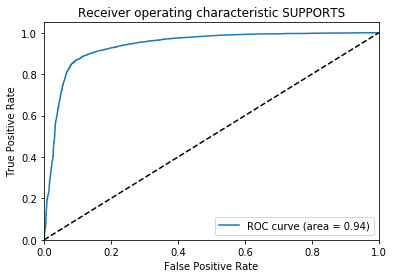

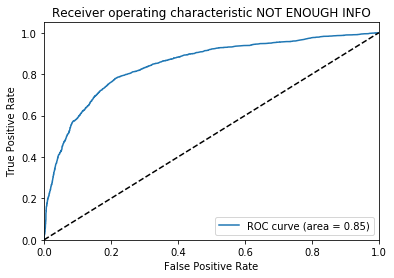

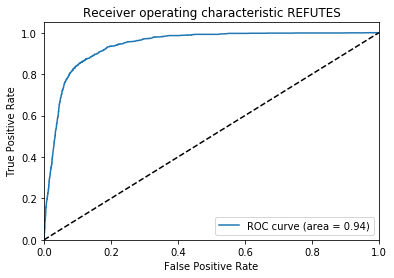

In [118]:
from sklearn.metrics import roc_curve, auc

n_classes = 3
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(eval_y[:, i], pred_proba_y[i][::, 1])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

print("Accuracy", metrics.accuracy_score(eval_y, pred_y))
# Plot of a ROC curve for a specific class
classifications = ['SUPPORTS', 'NOT ENOUGH INFO', 'REFUTES']
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr_rf[i], tpr_rf[i], label='ROC curve (area = %0.2f)' % roc_auc_rf[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic {}'.format(classifications[i]))
    plt.legend(loc="lower right")
    plt.show()

# Test5 Data

In [ ]:
test_logprobs_file = 'finetuning-roberta/outputs_more_epochs/test5-finetuned-roberta-epochs-logprobs'
test_decision_file = 'finetuning-roberta/outputs_more_epochs/test5-finetuned-roberta-epochs-predictions'
test_index_file = 'data/fever/test5.index'

test_logprobs_fp = open(test_logprobs_file, "r")
test_decision_fp = open(test_decision_file, "r")
test_index_fp = open(test_index_file, "r")

In [ ]:
test_logprobs_hdr = test_logprobs_fp.readline()
test_logprobs = []
for output in tqdm(test_logprobs_fp.readlines()):
    output = output.rstrip().split()
    if len(output)==4:
        probs = [float(output[1][1:]), float(output[2]), float(output[3][:-1])]
    elif len(output)==5 and output[1]=='[':
        probs = [float(output[2]), float(output[3]), float(output[4][:-1])]
    elif len(output)==5 and output[4]==']':
        probs = [float(output[1][1:]), float(output[2]), float(output[3])]
    elif len(output)==6:
        probs = [float(output[2]), float(output[3]), float(output[4])]
    test_logprobs.append(probs)

In [ ]:
test_logprobs = pd.DataFrame(test_logprobs)

In [ ]:
test_index = []
for output in tqdm(test_index_fp.readlines()):
    output = output.rstrip().split()
    test_index.append(output)
test_index = pd.DataFrame(test_index)

In [ ]:
test_data = pd.concat([test_index, test_logprobs], axis=1, ignore_index=True)

In [ ]:
test_data = test_data.drop(1, 1)
test_data = test_data.drop(2, 1)
test_data = test_data.drop(3, 1)
test_data.columns = ['ids', 'supports', 'neutral', 'refutes']

In [ ]:
test_data['claim_ids'] = test_data.groupby('ids').cumcount()
test_result = test_data.pivot(index='ids', columns='claim_ids')

In [ ]:
test_features = pd.concat([test_result['supports'], test_result['neutral'], test_result['refutes']], ignore_index=True, axis=1)

In [ ]:
test_features = test_features.values
test_features = imp.transform(test_features)

In [ ]:
pred_test = rf.predict(test_features)
pred_proba_test = rf.predict_proba(test_features)

In [ ]:
y_test = [0, 1, 2]

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_test_binarize = lb.fit_transform(y_test)

pred_test = lb.inverse_transform(pred_test)

In [ ]:
label_inv = {0: 'SUPPORTS', 1: 'NOT ENOUGH INFO', 2: 'REFUTES'}
test_classifications = [label_inv[k] for k in pred_test]

In [ ]:
rf_file = pd.concat([pd.DataFrame(test_result.index), pd.DataFrame(pred_test)], axis=1)

In [ ]:
rf_file.to_csv('data/fever/test5-finetuned-roberta-epochs-rf_file', header=False, index=False)

In [ ]:
test_classifications

# Using Neural Network

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import math

In [ ]:
class Feedforward(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Feedforward, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.output_size = output_size
        self.dropout = torch.nn.Dropout(p=0.05)
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size[0])
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size[0], self.hidden_size[1])
        self.fc3 = torch.nn.Linear(self.hidden_size[1], self.hidden_size[2])
        self.fc4 = torch.nn.Linear(self.hidden_size[2], self.output_size)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.dropout(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        output = self.sigmoid(x)
        return output

In [ ]:
batch_size = 1000
epoch = 150
input_size = 15
hidden_size = [50, 100, 50]
output_size = 3

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_eval, y_train, y_eval = train_test_split(features, labels, test_size = 0.2, random_state = 42)
x_test = test_features

In [ ]:
for i in tqdm(range(len(x_train))):
    for j in range(3):
        x_train[i][j*5:(j+1)*5] = np.sort(x_train[i][j*5:(j+1)*5])
for i in tqdm(range(len(x_eval))):
    for j in range(3):
        x_eval[i][j*5:(j+1)*5] = np.sort(x_eval[i][j*5:(j+1)*5])
for i in tqdm(range(len(x_test))):
    for j in range(3):
        x_test[i][j*5:(j+1)*5] = np.sort(x_test[i][j*5:(j+1)*5])

In [ ]:
x_train_batches = []
y_train_batches = []
x_eval_batches = []
y_eval_batches = []
x_test_batches = []
for i in tqdm(range(math.ceil(len(x_train)/batch_size))):
    x_train_batches.append(torch.FloatTensor(x_train[i*batch_size:i*batch_size+batch_size]))
    y_train_batches.append(torch.FloatTensor(y_train[i*batch_size:i*batch_size+batch_size]))
for i in tqdm(range(math.ceil(len(x_eval)/batch_size))):
    x_eval_batches.append(torch.FloatTensor(x_eval[i*batch_size:i*batch_size+batch_size]))
    y_eval_batches.append(torch.FloatTensor(y_eval[i*batch_size:i*batch_size+batch_size]))
for i in tqdm(range(math.ceil(len(x_test)/batch_size))):
    x_test_batches.append(torch.FloatTensor(x_test[i*batch_size:i*batch_size+batch_size]))

In [ ]:
model = Feedforward(input_size, hidden_size, output_size)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
model.eval()
y_pred = model(x_eval_batches[0])
before_train = criterion(y_pred.squeeze(), y_eval_batches[0])
print('Evaluation loss before training' , before_train.item())

In [ ]:
for param_group in optimizer.param_groups:
    param_group['lr'] = 0.001

In [ ]:
train_loss_evolution = []
eval_loss_evolution = []

In [ ]:
for epoch in range(250):
    model.train()
    train_loss = []
    for i in range(len(x_train_batches)):
        optimizer.zero_grad()
        # Forward pass
        y_pred = model(x_train_batches[i])
        # Compute Loss
        loss = criterion(y_pred.squeeze(), y_train_batches[i])
        
        train_loss.append(loss.item())
        # Backward pass
        loss.backward()
        optimizer.step()
    
    model.eval()
    eval_loss = []
    for i in range(len(x_eval_batches)):
        y_pred = model(x_eval_batches[i])
        after_train = criterion(y_pred.squeeze(), y_eval_batches[i])
        eval_loss.append(after_train.item())
    print('Epoch: {}, Training Loss: {}, Evalution Loss: {}'.format(epoch, np.mean(train_loss), np.mean(eval_loss)))
    train_loss_evolution.append(np.mean(train_loss))
    eval_loss_evolution.append(np.mean(eval_loss))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.plot(range(len(train_loss_evolution)), train_loss_evolution)
plt.plot(range(len(train_loss_evolution)), eval_loss_evolution)
plt.xlabel('Epoch')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Binary Cross Entropy Loss')
plt.legend(['Training Loss', 'Evalutaion Loss'])

In [ ]:
model.eval()
predictions = []
for i in range(len(x_test_batches)):
    y_pred = model(x_test_batches[i])
    predictions.append(y_pred)

In [ ]:
probs = []
labels = []
for batch in tqdm(predictions):
    values, idxs = batch.max(1)
    probs = probs + values.tolist()
    labels = labels + idxs.tolist()

In [ ]:
ff_file = pd.concat([pd.DataFrame(test_result.index), pd.DataFrame(labels)], axis=1)

In [ ]:
ff_file.to_csv('data/fever/test5-finetuned-roberta-epochs-ff-tuned3_file', header=False, index=False)

In [ ]:
x_train[0]

# Testing with full test data

## Training data

In [90]:
import pandas as pd
from tqdm import tqdm

hypothesis_file = 'data/fever/train50-truncated.hypothesis'
premise_file = 'data/fever/train50-truncated.premise'
label_file = 'data/fever/train50-truncated.label'
index_file = 'data/fever/train50-truncated.index'
logprobs_file = 'finetuning-roberta/outputs_parameter_tuning/params1/train50-truncated-finetuned-roberta-params1-logprobs'
decision_file = 'finetuning-roberta/outputs_parameter_tuning/params1/train50-truncated-finetuned-roberta-params1-results'

hypothesis_fp = open(hypothesis_file, "r")
premise_fp = open(premise_file, "r")
label_fp = open(label_file, "r")
index_fp = open(index_file, "r")
logprobs_fp = open(logprobs_file, "r")
decision_fp = open(decision_file, "r")

In [91]:
logprobs_hdr = logprobs_fp.readline()
logprobs = []
for output in tqdm(logprobs_fp.readlines()):
    output = output.rstrip().split()
    if len(output)==4:
        probs = [float(output[1][1:]), float(output[2]), float(output[3][:-1])]
    elif len(output)==5 and output[1]=='[':
        probs = [float(output[2]), float(output[3]), float(output[4][:-1])]
    elif len(output)==5 and output[4]==']':
        probs = [float(output[1][1:]), float(output[2]), float(output[3])]
    elif len(output)==6:
        probs = [float(output[2]), float(output[3]), float(output[4])]
    logprobs.append(probs)

100%|██████████| 3000039/3000039 [00:09<00:00, 314421.51it/s]


In [92]:
logprobs = pd.DataFrame(logprobs)

In [93]:
index = []
for output in tqdm(index_fp.readlines()):
    output = output.rstrip().split()
    index.append(output)
index = index[:len(logprobs)]

100%|██████████| 9797581/9797581 [00:21<00:00, 459594.80it/s] 


In [94]:
index = pd.DataFrame(index)

In [95]:
data = pd.concat([index, logprobs], axis=1, ignore_index=True)

In [96]:
data = data.drop(1, 1)
data = data.drop(2, 1)
data = data.drop(3, 1)

In [97]:
data.columns = ['ids', 'supports', 'neutral', 'refutes']

In [98]:
data['claim_ids'] = data.groupby('ids').cumcount()
result = data.pivot(index='ids', columns='claim_ids')

In [99]:
result.head(10)

supports                                                    \
claim_ids       0         1         2         3         4         5     
ids                                                                     
100004    -2.249075 -2.928968 -2.511117 -3.189722 -3.207441 -3.200376   
100008    -3.249417 -3.236319 -3.258230 -3.270654 -3.232797 -3.257920   
100015    -3.206785 -3.215637 -3.228110 -3.224283 -3.215745 -3.231602   
10002     -3.270819 -3.270770 -3.275023 -3.275170 -3.276432 -3.271478   
100022    -3.245568 -3.264273 -3.232799 -3.287289 -3.278953 -3.266227   
100032    -3.266231 -3.258645 -3.267889 -3.263960 -3.275918 -3.267804   
100035    -3.222639 -3.556985 -3.257236 -3.229745 -3.241588 -3.268331   
100040    -3.240856 -3.236626 -3.255646 -3.245752 -3.276256 -3.261837   
100051    -3.234097 -3.253132 -3.241075 -3.268115 -3.227566 -3.214641   
100061    -3.213636 -3.222338 -3.230530 -3.224939 -3.213003 -3.234520   

                                                   ... refutes              \
claim_ids       6         7         8         9    ...     353 354 355 356   
ids                                                ...                       
100004    -3.142753 -3.202490 -3.227860 -3.197501  ...     NaN NaN NaN NaN   
100008    -3.253166 -3.256280 -3.252097 -3.267854  ...     NaN NaN NaN NaN   
100015    -3.209411 -3.236177 -3.235633 -3.231221  ...     NaN NaN NaN NaN   
10002     -3.276817 -3.277696 -3.259258 -3.280213  ...     NaN NaN NaN NaN   
100022    -3.268978 -3.244434 -3.252852 -3.267886  ...     NaN NaN NaN NaN   
100032    -3.271504 -3.229685 -3.239249 -3.217783  ...     NaN NaN NaN NaN   
100035    -1.818097 -2.895528 -1.771691 -3.030566  ...     NaN NaN NaN NaN   
100040    -3.254625 -3.235012 -3.213823 -3.226850  ...     NaN NaN NaN NaN   
100051    -3.268884 -3.288718 -3.231568 -3.256639  ...     NaN NaN NaN NaN   
100061    -3.221863 -3.239471 -3.229144 -3.227205  ...     NaN NaN NaN NaN   

                                   
claim_ids 357 358 359 360 361 362  
ids                                
100004    NaN NaN NaN NaN NaN NaN  
100008    NaN NaN NaN NaN NaN NaN  
100015    NaN NaN NaN NaN NaN NaN  
10002     NaN NaN NaN NaN NaN NaN  
100022    NaN NaN NaN NaN NaN NaN  
100032    NaN NaN NaN NaN NaN NaN  
100035    NaN NaN NaN NaN NaN NaN  
100040    NaN NaN NaN NaN NaN NaN  
100051    NaN NaN NaN NaN NaN NaN  
100061    NaN NaN NaN NaN NaN NaN  

[10 rows x 1089 columns]

In [100]:
supports = result['supports']
refutes = result['refutes']
neutral = result['neutral']
feature_length = int(result.shape[1])

for i in range(int(feature_length/3), result['supports'].shape[1], 1):
    supports = supports.drop(i, 1)
    refutes = refutes.drop(i, 1)
    neutral = neutral.drop(i, 1)

In [101]:
result = pd.concat([supports, neutral, refutes], axis=1)

In [102]:
data = pd.read_json('data/fever/train.sentences.p5.s5.jsonl', lines=True)

In [103]:
data.head(10)

,id,verifiable,label,claim,evidence,predicted_pages,predicted_sentences
0,75397,VERIFIABLE,SUPPORTS,Nikolaj Coster-Waldau worked with the Fox Broa...,"[[[92206, 104971, Nikolaj_Coster-Waldau, 7], [...",[Fox_Broadcasting_Company],"[[Fox_Broadcasting_Company, 0], [Fox_Broadcast..."
1,150448,VERIFIABLE,SUPPORTS,Roman Atwood is a content creator.,"[[[174271, 187498, Roman_Atwood, 1]], [[174271...","[Lilly_Singh, Dennis_Roady, Roman_Atwood]","[[Roman_Atwood, 0], [Roman_Atwood, 2], [Roman_..."
2,214861,VERIFIABLE,SUPPORTS,"History of art includes architecture, dance, s...","[[[255136, 254645, History_of_art, 2]]]","[History_of_art, Acropolis_Institute_of_Techno...","[[History_of_art, 2], [List_of_New_Music_Ameri..."
3,156709,VERIFIABLE,REFUTES,Adrienne Bailon is an accountant.,"[[[180804, 193183, Adrienne_Bailon, 0]]]",[Adrienne_Bailon],"[[Adrienne_Bailon, 1], [Adrienne_Bailon, 0], [..."
4,83235,NOT VERIFIABLE,NOT ENOUGH INFO,System of a Down briefly disbanded in limbo.,"[[[100277, None, None, None]]]","[System_of_a_Down, Down_-LRB-film-RRB-]","[[System_of_a_Down, 6], [Down_-LRB-film-RRB-, ..."
5,129629,VERIFIABLE,SUPPORTS,Homeland is an American television spy thrille...,"[[[151831, 166598, Homeland_-LRB-TV_series-RRB...","[Andrew_Kaplan, Homeland_-LRB-TV_series-RRB-, ...","[[Homeland_-LRB-TV_series-RRB-, 0], [Homeland_..."
6,149579,NOT VERIFIABLE,NOT ENOUGH INFO,Beautiful reached number two on the Billboard ...,"[[[173384, None, None, None]]]","[Ricky_Martin_singles_discography, Beyoncé_di...","[[Akon_discography, 14], [Ricky_Martin_singles..."
7,229289,NOT VERIFIABLE,NOT ENOUGH INFO,Neal Schon was named in 1954.,"[[[273626, None, None, None]]]","[Neal_Schon, Double_Eclipse]","[[Neal_Schon, 0], [Neal_Schon, 5], [Double_Ecl..."
8,33078,VERIFIABLE,SUPPORTS,The Boston Celtics play their home games at TD...,"[[[49158, 58489, Boston_Celtics, 3]], [[49159,...","[List_of_Boston_Celtics_head_coaches, Boston_C...","[[Boston_Celtics, 3], [List_of_Boston_Celtics_..."
9,6744,VERIFIABLE,SUPPORTS,The Ten Commandments is an epic film.,"[[[23513, 28977, The_Ten_Commandments_-LRB-195...","[The_Ten_Commandments_-LRB-1923_film-RRB-, The...","[[The_Ten_Commandments_-LRB-1956_film-RRB-, 0]..."


In [104]:
labels = []
for i in tqdm(result.index):
    labels.append(data.loc[data['id']==int(i)]['label'].values[0])

100%|██████████| 36922/36922 [00:29<00:00, 1232.05it/s]


In [105]:
label = {'SUPPORTS': 0, 'NOT ENOUGH INFO': 1, 'REFUTES': 2}
labels = [label[k] for k in labels]

In [106]:
labels = labels[:len(result)]

In [107]:
labels = pd.DataFrame(labels, columns=['label'])

In [108]:
results = pd.concat([result.reset_index(), labels], axis=1, ignore_index=True)

In [109]:
features = results.loc[:, 1:feature_length].values
labels = results[feature_length+1].values

In [110]:
import numpy as np
num_feat = int(feature_length/3)
for i in tqdm(range(len(features))):
    for j in range(3):
        features[i][j*num_feat:(j+1)*num_feat] = -np.sort(-features[i][j*num_feat:(j+1)*num_feat])

100%|██████████| 36922/36922 [00:01<00:00, 25710.07it/s]


In [111]:
max_sentences = 250
new_features = []
for i in tqdm(features):
    fvector = []
    for j in range(3):
        fvector.extend(i[j*num_feat:j*num_feat+max_sentences])
    new_features.append(fvector)

100%|██████████| 36922/36922 [00:02<00:00, 16956.68it/s]


In [112]:
features = new_features

In [113]:
from sklearn.impute import SimpleImputer
import numpy as np
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(features)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [114]:
from sklearn.preprocessing import label_binarize
features = imp.transform(features)
labels = label_binarize(labels, classes=[0, 1, 2])

## Test data

In [119]:
test_logprobs_file = 'finetuning-roberta/outputs_parameter_tuning/params1/test-truncated-finetuned-roberta-params1-logprobs'
test_decision_file = 'finetuning-roberta/outputs_parameter_tuning/params1/test-truncated-finetuned-roberta-params1-results'
test_index_file = 'data/fever/test-truncated.index'

test_logprobs_fp = open(test_logprobs_file, "r")
test_decision_fp = open(test_decision_file, "r")
test_index_fp = open(test_index_file, "r")

In [120]:
test_logprobs_hdr = test_logprobs_fp.readline()
test_logprobs = []
for output in tqdm(test_logprobs_fp.readlines()):
    output = output.rstrip().split()
    if len(output)==4:
        probs = [float(output[1][1:]), float(output[2]), float(output[3][:-1])]
    elif len(output)==5 and output[1]=='[':
        probs = [float(output[2]), float(output[3]), float(output[4][:-1])]
    elif len(output)==5 and output[4]==']':
        probs = [float(output[1][1:]), float(output[2]), float(output[3])]
    elif len(output)==6:
        probs = [float(output[2]), float(output[3]), float(output[4])]
    test_logprobs.append(probs)

100%|██████████| 1595235/1595235 [00:06<00:00, 261795.74it/s]


In [121]:
test_logprobs = pd.DataFrame(test_logprobs)

In [122]:
test_index = []
for output in tqdm(test_index_fp.readlines()):
    output = output.rstrip().split()
    test_index.append(output)
test_index = pd.DataFrame(test_index)

100%|██████████| 1595235/1595235 [00:04<00:00, 373196.15it/s]


In [123]:
test_data = pd.concat([test_index, test_logprobs], axis=1, ignore_index=True)

In [124]:
test_data = test_data.drop(1, 1)
test_data = test_data.drop(2, 1)
test_data = test_data.drop(3, 1)
test_data.columns = ['ids', 'supports', 'neutral', 'refutes']

In [125]:
test_data['claim_ids'] = test_data.groupby('ids').cumcount()
test_result = test_data.pivot(index='ids', columns='claim_ids')
test_supports = test_result['supports']
test_refutes = test_result['refutes']
test_neutral = test_result['neutral']

#for i in range(int(test_result.shape[1]/3), test_result['supports'].shape[1], 1):
#    test_supports = test_supports.drop(i, 1)
#    test_refutes = test_refutes.drop(i, 1)
#    test_neutral = test_neutral.drop(i, 1)

In [126]:
test_features = pd.concat([test_supports, test_neutral, test_refutes], ignore_index=True, axis=1)

In [127]:
num_feat = int(test_result.shape[1]/3)
test_features = test_features.values
for i in tqdm(range(len(test_features))):
    for j in range(3):
        test_features[i][j*num_feat:(j+1)*num_feat] = -np.sort(-test_features[i][j*num_feat:(j+1)*num_feat])

100%|██████████| 19998/19998 [00:00<00:00, 28810.40it/s]


In [128]:
x_test = []
for i in tqdm(test_features):
    fvector = []
    for j in range(3):
        fvector.extend(i[j*num_feat:j*num_feat+max_sentences])
    x_test.append(fvector)

100%|██████████| 19998/19998 [00:01<00:00, 18351.83it/s]


In [129]:
x_test = imp.transform(x_test)

## Neural Net

In [130]:
import torch
import torchvision
import torchvision.transforms as transforms
import math

In [131]:
class FeedforwardBig(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeedforwardBig, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.output_size = output_size
        self.dropout1 = torch.nn.Dropout(p=0.05)
        self.dropout2 = torch.nn.Dropout(p=0.05)
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size[0])
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size[0], self.hidden_size[1])
        self.fc3 = torch.nn.Linear(self.hidden_size[1], self.hidden_size[2])
        self.fc4 = torch.nn.Linear(self.hidden_size[2], self.hidden_size[3])
        self.fc5 = torch.nn.Linear(self.hidden_size[3], self.output_size)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.dropout1(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        output = self.sigmoid(x)
        return output

In [132]:
batch_size = 100
input_size = max_sentences*3
hidden_size = [250, 100, 25, 10]
output_size = 3

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_eval, y_train, y_eval = train_test_split(features, labels, test_size = 0.2, random_state = 42)

In [134]:
x_train = train_x
y_train = train_y
x_eval = eval_x
y_eval = eval_y

In [135]:
x_train_batches = []
y_train_batches = []
x_eval_batches = []
y_eval_batches = []
x_test_batches = []
for i in tqdm(range(math.ceil(len(x_train)/batch_size))):
    x_train_batches.append(torch.FloatTensor(x_train[i*batch_size:i*batch_size+batch_size]))
    y_train_batches.append(torch.FloatTensor(y_train[i*batch_size:i*batch_size+batch_size]))
for i in tqdm(range(math.ceil(len(x_eval)/batch_size))):
    x_eval_batches.append(torch.FloatTensor(x_eval[i*batch_size:i*batch_size+batch_size]))
    y_eval_batches.append(torch.FloatTensor(y_eval[i*batch_size:i*batch_size+batch_size]))
for i in tqdm(range(math.ceil(len(x_test)/batch_size))):
    x_test_batches.append(torch.FloatTensor(x_test[i*batch_size:i*batch_size+batch_size]))

100%|██████████| 200/200 [00:00<00:00, 247.43it/s]


In [136]:
model = FeedforwardBig(input_size, hidden_size, output_size)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [137]:
model.eval()
y_pred = model(x_eval_batches[0])
before_train = criterion(y_pred.squeeze(), y_eval_batches[0])
print('Evaluation loss before training' , before_train.item())

Evaluation loss before training 0.6767350435256958


In [49]:
for param_group in optimizer.param_groups:
    param_group['lr'] = 0.001

In [138]:
train_loss_evolution = []
eval_loss_evolution = []

In [143]:
for epoch in range(200):
    model.train()
    train_loss = []
    for i in range(len(x_train_batches)):
        optimizer.zero_grad()
        # Forward pass
        y_pred = model(x_train_batches[i])
        # Compute Los
        loss = criterion(y_pred.squeeze(), y_train_batches[i])
        
        train_loss.append(loss.item())
        # Backward pass
        loss.backward()
        optimizer.step()
    
    model.eval()
    eval_loss = []
    for i in range(len(x_eval_batches)):
        y_pred = model(x_eval_batches[i])
        after_train = criterion(y_pred.squeeze(), y_eval_batches[i])
        eval_loss.append(after_train.item())
    print('Epoch: {}, Training Loss: {}, Evalution Loss: {}'.format(epoch, np.mean(train_loss), np.mean(eval_loss)))
    train_loss_evolution.append(np.mean(train_loss))
    eval_loss_evolution.append(np.mean(eval_loss))

Epoch: 0, Training Loss: 0.30981952203689395, Evalution Loss: 0.3037798018068881
Epoch: 1, Training Loss: 0.3082953372819198, Evalution Loss: 0.3017291990486351
Epoch: 2, Training Loss: 0.3093294611049665, Evalution Loss: 0.30228664041370956
Epoch: 3, Training Loss: 0.30960534679124485, Evalution Loss: 0.2990713111452154
Epoch: 4, Training Loss: 0.30911994403278503, Evalution Loss: 0.3080065246369388
Epoch: 5, Training Loss: 0.30938282845592174, Evalution Loss: 0.3000736174148482
Epoch: 6, Training Loss: 0.3089735582974312, Evalution Loss: 0.30927280356755127
Epoch: 7, Training Loss: 0.30965415972310145, Evalution Loss: 0.30343422011749166
Epoch: 8, Training Loss: 0.30868755265868997, Evalution Loss: 0.3040329385045412
Epoch: 9, Training Loss: 0.30802295573458477, Evalution Loss: 0.29970034493787867
Epoch: 10, Training Loss: 0.3092539325054433, Evalution Loss: 0.3069388149557887
Epoch: 11, Training Loss: 0.30967218967507015, Evalution Loss: 0.3082209555683909
Epoch: 12, Training Loss: 

Epoch: 101, Training Loss: 0.3073880202766206, Evalution Loss: 0.2988902906308303
Epoch: 102, Training Loss: 0.3088464158511645, Evalution Loss: 0.30282011648287643
Epoch: 103, Training Loss: 0.3076223413384444, Evalution Loss: 0.30016449919423543
Epoch: 104, Training Loss: 0.3079866375774145, Evalution Loss: 0.3019643508501955
Epoch: 105, Training Loss: 0.30878466564054424, Evalution Loss: 0.2990952410005234
Epoch: 106, Training Loss: 0.308855914838008, Evalution Loss: 0.3029301931729188
Epoch: 107, Training Loss: 0.3087393427015962, Evalution Loss: 0.302045328995666
Epoch: 108, Training Loss: 0.30820593912456484, Evalution Loss: 0.3028161306236241
Epoch: 109, Training Loss: 0.30892428559427326, Evalution Loss: 0.3092796639413447
Epoch: 110, Training Loss: 0.3072126116603613, Evalution Loss: 0.3028332578974801
Epoch: 111, Training Loss: 0.3076229968888534, Evalution Loss: 0.30050078195494573
Epoch: 112, Training Loss: 0.30667489827484695, Evalution Loss: 0.3028272819277403
Epoch: 113,

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

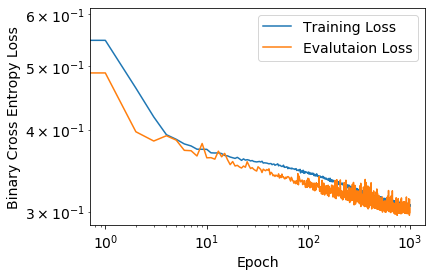

In [147]:
plt.plot(range(len(train_loss_evolution)), train_loss_evolution)
plt.plot(range(len(train_loss_evolution)), eval_loss_evolution)
plt.xlabel('Epoch')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Binary Cross Entropy Loss')
plt.legend(['Training Loss', 'Evalutaion Loss'])
plt.rcParams.update({'font.size': 20})
plt.savefig('/home/miproj/4thyr.oct2019/jp730/fever2018/figures/NN-original-training-curve.png', dpi=200, bbox_inches='tight')

In [57]:
model.eval()
predictions = []
for i in range(len(x_test_batches)):
    y_pred = model(x_test_batches[i])
    predictions.append(y_pred)

In [58]:
probs = []
labels = []
for batch in tqdm(predictions):
    values, idxs = batch.max(1)
    probs = probs + values.tolist()
    labels = labels + idxs.tolist()

100%|██████████| 200/200 [00:00<00:00, 4722.36it/s]


In [59]:
ff_file = pd.concat([pd.DataFrame(test_result.index), pd.DataFrame(labels)], axis=1)

In [60]:
ff_file.to_csv('data/fever/old_roberta_for_figure', header=False, index=False)

In [148]:
model.eval()
predictions = []
for i in range(len(x_eval_batches)):
    y_pred = model(x_eval_batches[i])
    predictions.append(y_pred)

In [149]:
probs = []
for batch in tqdm(predictions):
    probs.extend(batch.tolist())

labels = []
for batch in tqdm(predictions):
    values, idxs = batch.max(1)
    labels = labels + idxs.tolist()

100%|██████████| 74/74 [00:00<00:00, 112.03it/s]


Accuracy 0.7975626269465133


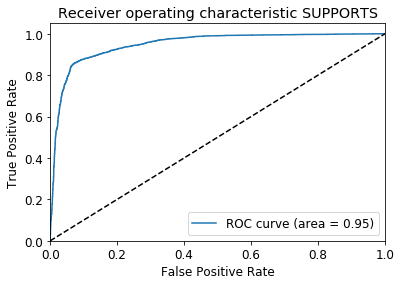

<Figure size 432x288 with 0 Axes>

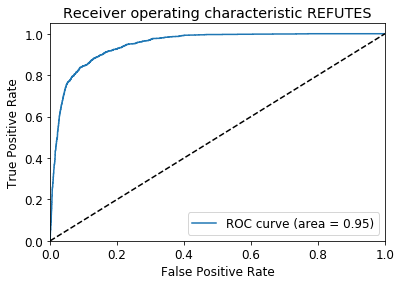

<Figure size 432x288 with 0 Axes>

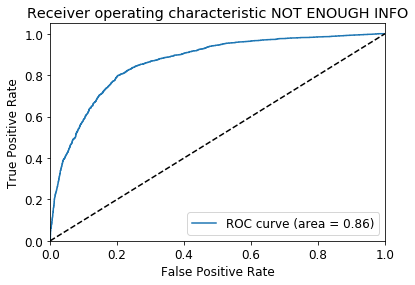

<Figure size 432x288 with 0 Axes>

In [151]:
from sklearn.metrics import roc_curve, auc, accuracy_score
plt.rcParams.update({'font.size': 12})

n_classes = 3
fpr_mlp = dict()
tpr_mlp = dict()
roc_auc_mlp = dict()
for i in range(n_classes):
    fpr_mlp[i], tpr_mlp[i], _ = roc_curve(y_eval[:, i], [x[i] for x in probs])
    roc_auc_mlp[i] = auc(fpr_mlp[i], tpr_mlp[i])

eval_y = [x.tolist().index(1) for x in y_eval]
print("Accuracy", accuracy_score(eval_y, labels))
# Plot of a ROC curve for a specific class
classes = ['SUPPORTS', 'NOT ENOUGH INFO', 'REFUTES']
for i in [0, 2, 1]:
    plt.figure()
    plt.plot(fpr_mlp[i], tpr_mlp[i], label='ROC curve (area = %0.2f)' % roc_auc_mlp[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic {}'.format(classes[i]))
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig('/home/miproj/4thyr.oct2019/jp730/fever2018/figures/NN-ROC-'+str(classes[i]), dpi=200, bbox_inches='tight')

In [152]:
pred_data = pd.read_json('data/fever/train-papelo-predictions', lines=True)
true_data = pd.read_json('data/fever-data/train.jsonl', lines=True)

In [153]:
def change_label(label):
    if label=='REFUTES':
        return 0
    elif label=='SUPPORTS':
        return 1
    else:
        return 2

In [154]:
pred_y = pred_data['predicted_label'].apply(change_label).tolist()
test_y = true_data['label'].apply(change_label).tolist()
pred_y = label_binarize(pred_y, classes=[0, 1, 2])
test_y = label_binarize(test_y, classes=[0, 1, 2])

Accuracy 0.657041299699551


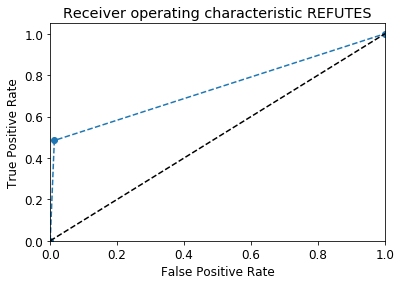

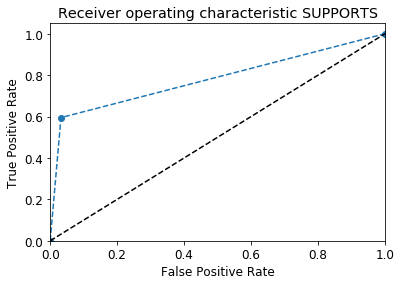

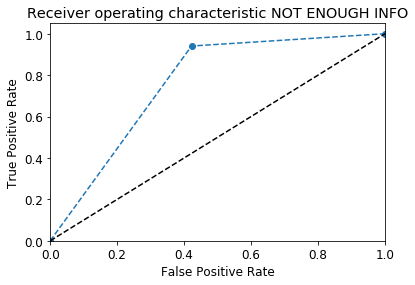

In [156]:
from sklearn.metrics import roc_curve, auc

n_classes = 3
fpr_papelo = dict()
tpr_papelo = dict()
roc_auc_papelo = dict()
for i in range(n_classes):
    fpr_papelo[i], tpr_papelo[i], _ = roc_curve(test_y[:, i], pred_y[:, i])
    roc_auc_papelo[i] = auc(fpr_papelo[i], tpr_papelo[i])

print("Accuracy", metrics.accuracy_score(test_y, pred_y))
# Plot of a ROC curve for a specific class
classes = ['REFUTES', 'SUPPORTS', 'NOT ENOUGH INFO']
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr_papelo[i], tpr_papelo[i], '--o', label='ROC curve (area = %0.2f)' % roc_auc_papelo[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic {}'.format(classes[i]))
    plt.show()

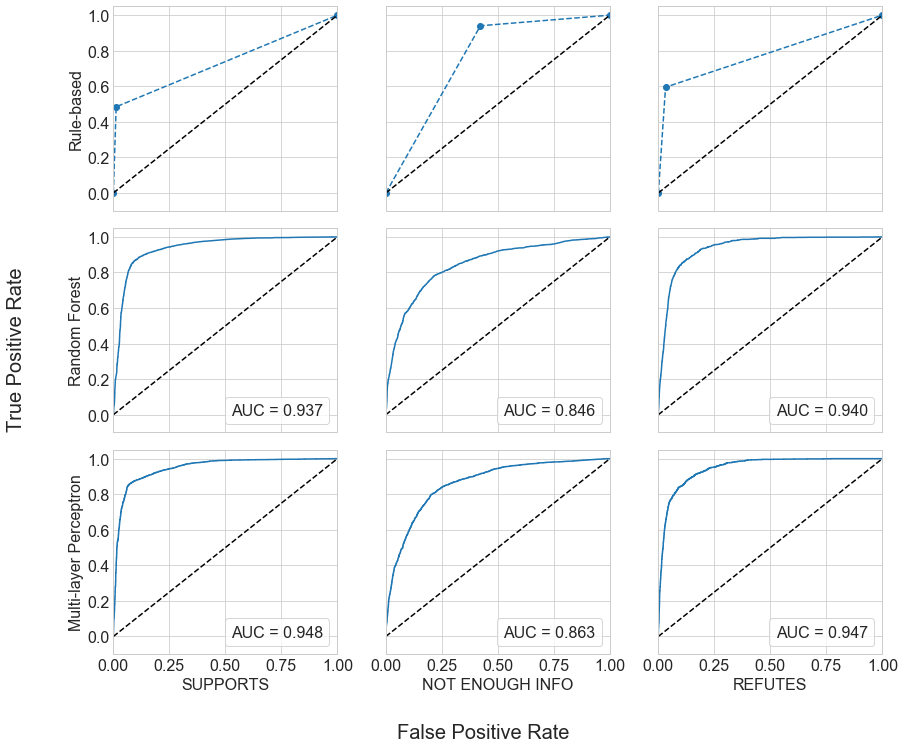

In [191]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(3, 3, figsize=(12, 10), sharex=True)
plt.rcParams.update({'font.size': 16})
ax[0][0].plot(fpr_papelo[0], tpr_papelo[0], '--o', label='ROC curve (area = %0.2f)' % roc_auc_papelo[0])
ax[0][0].plot([0, 1], [0, 1], 'k--')
ax[0][0].set_xlim([0.0, 1.0])
ax[0][0].set_ylim([-0.1, 1.05])
ax[0][1].plot(fpr_papelo[2], tpr_papelo[2], '--o', label='ROC curve (area = %0.2f)' % roc_auc_papelo[2])
ax[0][1].plot([0, 1], [0, 1], 'k--')
ax[0][1].set_xlim([0.0, 1.0])
ax[0][1].set_ylim([-0.1, 1.05])
ax[0][2].plot(fpr_papelo[1], tpr_papelo[1], '--o', label='ROC curve (area = %0.2f)' % roc_auc_papelo[1])
ax[0][2].plot([0, 1], [0, 1], 'k--')
ax[0][2].set_xlim([0.0, 1.0])
ax[0][2].set_ylim([-0.1, 1.05])

for i in range(3):
    ax[1][i].plot(fpr_rf[i], tpr_rf[i], label='AUC = %0.3f' % roc_auc_rf[i])
    ax[1][i].plot([0, 1], [0, 1], 'k--')
    ax[1][i].set_xlim([0.0, 1.0])
    ax[1][i].set_ylim([-0.1, 1.05])
    ax[1][i].legend(loc="lower right", handlelength=0, handletextpad=0, fancybox=True, frameon=True)

for i in range(3):
    ax[2][i].plot(fpr_mlp[i], tpr_mlp[i], label='AUC = %0.3f' % roc_auc_mlp[i])
    ax[2][i].plot([0, 1], [0, 1], 'k--')
    ax[2][i].set_xlim([0.0, 1.0])
    ax[2][i].set_ylim([-0.1, 1.05])
    ax[2][i].legend(loc="lower right", handlelength=0, handletextpad=0, fancybox=True, frameon=True)
    

for a in ax.flat:
    a.label_outer()
ax[0][0].set_ylabel('Rule-based')
ax[1][0].set_ylabel('Random Forest')
ax[2][0].set_ylabel('Multi-layer Perceptron')
ax[2][0].set_xlabel('SUPPORTS')
ax[2][1].set_xlabel('NOT ENOUGH INFO')
ax[2][2].set_xlabel('REFUTES')
fig.text(-0.04, 0.5, 'True Positive Rate', ha='center', va='center', rotation='vertical', size=20)
fig.text(0.5, -0.04, 'False Positive Rate', ha='center', size=20)
plt.tight_layout()
plt.savefig('test.png', bbox_inches='tight', dpi=250)